# EDA(Exploratory Data Analysis)

* In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. 
* Primarily for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 
* Offered by _Tukey_, suggesting focusing on data analysis rather than hypothesis testing.
* Objectives:
    * Suggest hypothesis about the causes of observed phenomena
    * Assess assumptions on which statistical inference will be based
    * Support the selection of appropriate statistical tools and techniques
    * Provide a basis for further data collection through surveys or experiments
    
*_From_ [https://en.wikipedia.org/wiki/Exploratory_data_analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)


# Practice 2. Analyze COVID-19 data
* Using `read_csv()`, you can read `.csv` file in Pandas Dataframe
    * _ex._ doc = pd.read_csv('FILE_NAME.csv', encoding='utf-8-sig', quotechar=',')  # defined delimeter
    * _ex._ doc = pd.read_csv('FILE_NAME.csv', encoding='utf-8-sig', error_bad_lines=False) # ignore error lines
* Using `read_excel()`, you can read `.xlsx` file in Pandas Dataframe
    * _ex._ doc = pd.read_excel('FILE_NAME.xlsx', sheet_name='SHEET_NAME')

In [2]:
import pandas as pd

# Read .csv file
doc = pd.read_csv("Examples/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')

## 1. Understand source and topic of the data

## 2. Understand size of the data
* Using `head()`, you can see 5 data from the top
    * Using `head(n)`, you can see _n_ data from the top
* Using `tail()`, you can see 5 data from the bottom
    * Using `tail(n)`, you can see _n_ data from the bottom

In [3]:
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


* Using `shape`, you can check (row, col)
* Using `info`, you can check data in each column and non-null count
    * _**NA**_: **N**ot **A**vailable
    * _**NAN**_: **N**ot **A** **N**umber

In [4]:
doc.shape  # NOTE: it's not a function

(2483, 12)

In [5]:
doc.info  # NOTE: it's not a function

<bound method DataFrame.info of          FIPS     Admin2  Province_State      Country_Region  \
0     45001.0  Abbeville  South Carolina                  US   
1     22001.0     Acadia       Louisiana                  US   
2     51001.0   Accomack        Virginia                  US   
3     16001.0        Ada           Idaho                  US   
4     19001.0      Adair            Iowa                  US   
...       ...        ...             ...                 ...   
2478      NaN        NaN             NaN           Venezuela   
2479      NaN        NaN             NaN             Vietnam   
2480      NaN        NaN             NaN  West Bank and Gaza   
2481      NaN        NaN             NaN              Zambia   
2482      NaN        NaN             NaN            Zimbabwe   

              Last_Update        Lat       Long_  Confirmed  Deaths  \
0     2020-04-01 21:58:49  34.223334  -82.461707          4       0   
1     2020-04-01 21:58:49  30.295065  -92.414197         

## 3. Understand attribution of data

* Using `describe()`, you can check following statistical values:
    * count
    * std
    * mean
    * min
    * max
    * 25%(quartile)
    * 50%(quartile)
    * 75%(quartile)

* Using `corr(method=COEFFICIENT)`, you can check correlation of each data
    * default: _Pearson Correlation_
        * +1: positive linear correlation
        *  0: no correlation
        * -1: negative linear correlation

In [6]:
doc.columns  # Understand each column

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

In [7]:
doc.describe()  # NOTE: this is a function

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2171.000000,2482.000000,2482.000000,2483.000000,2483.000000,2483.000000,2483.000000
mean,30017.933671,35.648140,-77.259529,375.596053,18.851792,77.797422,195.069271
std,15494.172170,11.348356,44.340152,4210.635475,351.565670,1506.657766,2798.254454
min,1001.000000,-42.882100,-159.596679,0.000000,0.000000,0.000000,0.000000
25%,18050.000000,33.206991,-94.768959,2.000000,0.000000,0.000000,0.000000
50%,29027.000000,37.565526,-86.181966,7.000000,0.000000,0.000000,0.000000
75%,45016.000000,41.416065,-79.409001,34.000000,1.000000,0.000000,0.000000
max,99999.000000,71.706900,178.065000,110574.000000,13155.000000,63326.000000,80572.000000


In [8]:
doc['FIPS'].describe() # you can specify column

count     2171.000000
mean     30017.933671
std      15494.172170
min       1001.000000
25%      18050.000000
50%      29027.000000
75%      45016.000000
max      99999.000000
Name: FIPS, dtype: float64

In [9]:
doc.corr()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
FIPS,1.000000,0.144217,0.139813,0.003306,-0.000190,NaN,NaN
Lat,0.144217,1.000000,-0.487517,0.028217,0.021578,-0.004630,0.029301
Long_,0.139813,-0.487517,1.000000,0.157110,0.104027,0.155989,0.143738
Confirmed,0.003306,0.028217,0.157110,1.000000,0.886551,0.727257,0.913162
Deaths,-0.000190,0.021578,0.104027,0.886551,1.000000,0.567840,0.880624
Recovered,NaN,-0.004630,0.155989,0.727257,0.567840,1.000000,0.493139
Active,NaN,0.029301,0.143738,0.913162,0.880624,0.493139,1.000000


## 4. Visualize data to understand features

* matplotlib
* seaborn
* plotly

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

"""
    %matplotlib inline
    it's a 'magic function' in IPython. IPython has a set of predefined 'magic functions'.
    And there are two kinds of 'magics':

    1. line-oriented (prefixed with '%')
    2. cell-oriented (prefixed with '%%')

    more reference: https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained
"""

"\n    %matplotlib inline\n    it's a 'magic function' in IPython. IPython has a set of predefined 'magic functions'.\n    And there are two kinds of 'magics':\n\n    1. line-oriented (prefixed with '%')\n    2. cell-oriented (prefixed with '%%')\n\n    more reference: https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained\n"

In [11]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

* Graph settings
    sns.heatmap(data=doc.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')
    * data: dataframe(table type)
    * annot: to show value in each cell
    * fmt: set floating point
    * linewidths: width between cells
    * cmap: cell color (ref: [https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html))

<AxesSubplot:>

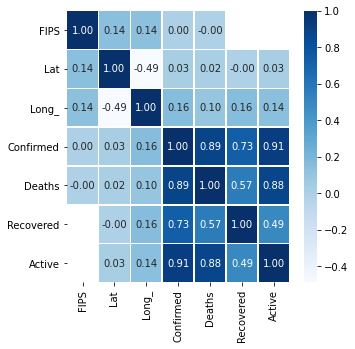

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(data=doc.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')

## 5. Extract Series data

* choose column data

In [13]:
countries = doc['Country_Region']
countries.head()

0    US
1    US
2    US
3    US
4    US
Name: Country_Region, dtype: object

* Using `size`, returns size including all data   _NOTE_: it's not a function
* Using `count()`, returns size except _NAN_
* Using `unique()`, returns unique value
* Using `value_counts()`, returns counts of data except _NaN_

In [14]:
print(countries.size, countries.count())

2483 2483


In [15]:
print(countries.unique())

['US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia'
 'Denmark' 'France' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad' 'Chile'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Diamond Princess'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'It

In [16]:
countries.value_counts()

US                      2228
China                     33
Canada                    15
United Kingdom            10
France                    10
                        ... 
Nepal                      1
India                      1
Niger                      1
Kazakhstan                 1
United Arab Emirates       1
Name: Country_Region, Length: 180, dtype: int64

In [17]:
covid_stat = doc[['Confirmed', 'Deaths', 'Recovered']]  # Choose specific data
covid_stat.head()

,Confirmed,Deaths,Recovered
0,4,0,0
1,47,1,0
2,7,0,0
3,195,3,0
4,1,0,0


In [18]:
us_data = doc[doc['Country_Region'] == 'US']
us_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2246,66000.0,NaN,Guam,US,2020-04-01 21:58:49,13.444300,144.793700,77,3,0,0,"Guam, US"
2273,NaN,NaN,Northern Mariana Islands,US,2020-04-01 21:58:49,15.097900,145.673900,6,1,0,0,",Northern Mariana Islands,US"
2279,NaN,NaN,Puerto Rico,US,2020-04-01 21:58:49,18.220800,-66.590100,286,11,0,0,"Puerto Rico, US"
2284,NaN,NaN,Recovered,US,2020-04-01 21:58:49,0.000000,0.000000,0,0,8474,0,"Recovered, US"


## 6. Exclude missing data

* Using `insull()`, returns whether there is _NaN_ data
* Using `sum()` at the end, you can check the number of rows with _NaN_ data
    * Usually used with `isnull().sum()`
* Using `dropna()`, you can delete rows with _NaN_ data

In [19]:
doc.isnull().sum()

FIPS              312
Admin2            262
Province_State    176
Country_Region      0
Last_Update         0
Lat                 1
Long_               1
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64

In [20]:
doc = doc.dropna()
doc

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2216,51199.0,York,Virginia,US,2020-04-01 21:58:49,37.243748,-76.544128,16,1,0,0,"York, Virginia, US"
2217,48503.0,Young,Texas,US,2020-04-01 21:58:49,33.176597,-98.687909,3,0,0,0,"Young, Texas, US"
2218,6115.0,Yuba,California,US,2020-04-01 21:58:49,39.262559,-121.353564,7,0,0,0,"Yuba, California, US"
2219,4027.0,Yuma,Arizona,US,2020-04-01 21:58:49,32.768957,-113.906667,12,0,0,0,"Yuma, Arizona, US"


* Or, you can specify column

In [21]:
doc = pd.read_csv("Examples/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')
doc = doc.dropna(subset=['Confirmed'])
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


* You can also fill _NaN_ data with values 

In [22]:
doc = pd.read_csv("Examples/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')
doc = doc.fillna(0)
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [23]:
doc = pd.read_csv("Examples/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')
nan_data = {'Deaths': 0, 'Recovered': 0}
doc = doc.fillna(nan_data)
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


## 7. Group by keys
* Using `groupby()`, you can group columns
* Using `groupby().sum()`, you can get sum of grouped columns

In [24]:
doc = pd.read_csv("Examples/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [25]:
doc = doc.groupby('Country_Region').sum()
doc.head()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,,,
Afghanistan,0.0,33.93911,67.709953,237,4,5,228
Albania,0.0,41.15330,20.168300,259,15,67,177
Algeria,0.0,28.03390,1.659600,847,58,61,728
Andorra,0.0,42.50630,1.521800,390,14,10,366
Angola,0.0,-11.20270,17.873900,8,2,1,5


In [26]:
doc.columns

Index(['FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [27]:
doc.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country_Region', length=180)

In [28]:
doc[doc.index == 'US']  # you can select specific index

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,,,
US,65168934.0,82956.96013,-197553.963757,213372,4757,8474,0


## 8. Change data type

In [32]:
doc = pd.read_csv("Examples/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')
doc = doc[['Country_Region', 'Confirmed']]  # select specific column
doc = doc.dropna(subset=['Confirmed'])      # remove NaN
doc = doc.astype({'Confirmed': 'int64'})    # change data type in a specific column
doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2483 entries, 0 to 2482
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country_Region  2483 non-null   object
 1   Confirmed       2483 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.2+ KB


In [33]:
doc.head()

,Country_Region,Confirmed
0,US,4
1,US,47
2,US,7
3,US,195
4,US,1


In [34]:
doc.columns = ['Country/Region', 'Confirmed']
doc.columns

Index(['Country/Region', 'Confirmed'], dtype='object')

## 9. Remove duplicated rows
* Using `duplicated()`, you can check if there is a duplicated row

In [37]:
doc = pd.read_csv("Examples/COVID-19-master/csse_covid_19_data/UID_ISO_FIPS_LookUp_table.csv", encoding='utf-8-sig')
doc = doc[['iso2', 'Country_Region']]
doc

,iso2,Country_Region
0,BW,Botswana
1,BI,Burundi
2,SL,Sierra Leone
3,AF,Afghanistan
4,AL,Albania
...,...,...
3555,US,US
3556,US,US
3557,US,US
3558,US,US


In [38]:
doc.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3555     True
3556     True
3557     True
3558     True
3559     True
Length: 3560, dtype: bool

In [39]:
doc[doc.duplicated()]

,iso2,Country_Region
194,GB,United Kingdom
200,AU,Australia
201,AU,Australia
202,AU,Australia
203,AU,Australia
...,...,...
3555,US,US
3556,US,US
3557,US,US
3558,US,US


* Using `drop_duplicates()`, you can check duplicated row
    * subset=SPECIFIC_COLUMN
    * if it first appeared, `keep='first'` by default
    * else, `keep='last'`

In [40]:
doc = doc.drop_duplicates(subset='Country_Region', keep='last')
doc

,iso2,Country_Region
0,BW,Botswana
1,BI,Burundi
2,SL,Sierra Leone
3,AF,Afghanistan
4,AL,Albania
...,...,...
198,TC,United Kingdom
206,AU,Australia
221,CA,Canada
254,CN,China
